1. 회원권 만들기    
   (`체류시간 음의 방향성, 3일체험후 이탈 유저(가격설득)`abtest am/pm)   

2. 첫 경험 개선 방향    
   (`하루 이용한 유저를 설득해서  
   → trial_day를 늘리게 만들고 → 만든 회원권에서 가격설득을 통해 결제유도`)

3. 사무직 집중 지역 고려하여 입지 선정  

4. 무료 체험 시스템 개선 (신청한 일자로 부터 3일 기준)    
   (귀찮아서 안오거나, 갑작스런 스케쥴로 인해 2 ~ 3일차만 이용한 유저들을 위해 `일자 변경 신청 시스템 (전화/홈페이지/앱 등)생성`)  

5. 사이트 및 앱 시스템 개선    
   (지점 별 예약 인원 수 날짜별로 고객이 확인할 수 있도록 지정. `비교적 널널한 날짜(시간대)에 신청할 수 있도록 유도`)

In [185]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nuwba\Desktop\Codeit_4\중급2_프로젝트\중급_2\merged_user_data_2.csv")

df = df.drop(['user_uuid', 'first_trial_date', 'last_trial_date', 'first_trial_covid_level', 'last_trial_covid_level'], axis=1)


df

,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,start_trial_year,start_trial_month,start_trial_hour,start_trial_day_of_week,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,avg_stay_time,holiday_weekend,other_site
0,3,150,6689.229446,1,0,2021,6,20,2,2021,6,22,2,1.0,1.0,0,6689.229446,0,0
1,3,150,85811.532606,1,3,2021,6,0,2,2021,6,23,2,3.0,3.0,1,85811.532606,0,0
2,4,100,14505.346647,1,0,2021,6,15,2,2021,6,19,2,3.0,3.0,0,14505.346647,0,0
3,3,150,13084.318509,1,0,2021,6,13,2,2021,6,17,2,1.0,1.0,0,13084.318509,0,0
4,2,100,7617.656856,1,1,2021,7,13,3,2021,7,16,3,1.0,1.0,0,7617.656856,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,6,150,87665.062060,3,0,2023,12,15,5,2024,1,23,0,12.0,12.0,1,29221.687353,1,1
5478,4,100,6718.263533,2,0,2023,12,18,5,2024,1,18,0,3.0,3.0,1,3359.131767,1,1
5479,47,50,33028.844900,2,0,2023,12,15,5,2024,1,18,0,6.0,6.0,0,16514.422450,1,0
5480,3,150,11977.273214,1,2,2024,1,15,0,2024,1,18,0,3.0,3.0,0,11977.273214,1,0


In [186]:
df.columns.tolist()

['last_site_id',
 'area_pyeong',
 'stay_time_second_total',
 'trial_day',
 'trial_gap',
 'start_trial_year',
 'start_trial_month',
 'start_trial_hour',
 'start_trial_day_of_week',
 'final_trial_year',
 'final_trial_month',
 'final_trial_hour',
 'final_trial_day_of_week',
 'check_in_total_count',
 'check_out_total_count',
 'is_payment',
 'avg_stay_time',
 'holiday_weekend',
 'other_site']

'stay_time_second_total' / 'check_in_total_count' / 'check_out_total_count' / 'avg_stay_time' box-cox 정규화 진행  
정규화 후 standardScaler 로 표준화 진행
 
<br>
- 싸이클릭만 진행  

 'start_trial_month',  
 'start_trial_hour',  
 'start_trial_day_of_week',  

 'final_trial_month',  
 'final_trial_hour',  
 'final_trial_day_of_week',  

<br>

In [187]:
import numpy as np

# 복사본 생성 (원본 df 유지하고 싶다면)
df_cyclic = df.copy()

# 적용할 컬럼과 주기(period) 정의
cyclic_features = {
    "start_trial_month": 12,         # 1~12
    "start_trial_hour": 24,          # 0~23
    "start_trial_day_of_week": 7,    # 0~6
    "final_trial_month": 12,
    "final_trial_hour": 24,
    "final_trial_day_of_week": 7
}

# 각 컬럼별로 sin, cos 변환 추가
for col, period in cyclic_features.items():
    df_cyclic[f"{col}_sin"] = np.sin(2 * np.pi * df_cyclic[col] / period)
    df_cyclic[f"{col}_cos"] = np.cos(2 * np.pi * df_cyclic[col] / period)

df_cyclic.drop(columns=cyclic_features.keys(), inplace=True)

df_cyclic

,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,start_trial_year,final_trial_year,check_in_total_count,check_out_total_count,is_payment,...,start_trial_hour_sin,start_trial_hour_cos,start_trial_day_of_week_sin,start_trial_day_of_week_cos,final_trial_month_sin,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos
0,3,150,6689.229446,1,0,2021,2021,1.0,1.0,0,...,-0.866025,5.000000e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521
1,3,150,85811.532606,1,3,2021,2021,3.0,3.0,1,...,0.000000,1.000000e+00,0.974928,-0.222521,1.224647e-16,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521
2,4,100,14505.346647,1,0,2021,2021,3.0,3.0,0,...,-0.707107,-7.071068e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521
3,3,150,13084.318509,1,0,2021,2021,1.0,1.0,0,...,-0.258819,-9.659258e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521
4,2,100,7617.656856,1,1,2021,2021,1.0,1.0,0,...,-0.258819,-9.659258e-01,0.433884,-0.900969,-5.000000e-01,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,6,150,87665.062060,3,0,2023,2024,12.0,12.0,1,...,-0.707107,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-0.258819,9.659258e-01,0.000000,1.000000
5478,4,100,6718.263533,2,0,2023,2024,3.0,3.0,1,...,-1.000000,-1.836970e-16,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000
5479,47,50,33028.844900,2,0,2023,2024,6.0,6.0,0,...,-0.707107,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000
5480,3,150,11977.273214,1,2,2024,2024,3.0,3.0,0,...,-0.707107,-7.071068e-01,0.000000,1.000000,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000


- office_spot 생성

In [188]:
# 매핑 딕셔너리 정의
site_score_map = {
    5: 9,
    1: 8,
    4: 7,
    3: 6,
    49: 5,
    17: 4,
    6: 3,
    2: 2,
    47: 1
}

# last_site_id 기준으로 매핑 → office_spot 생성
df_cyclic["office_spot"] = df_cyclic["last_site_id"].map(site_score_map)


In [189]:
df_cyclic

,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,start_trial_year,final_trial_year,check_in_total_count,check_out_total_count,is_payment,...,start_trial_hour_cos,start_trial_day_of_week_sin,start_trial_day_of_week_cos,final_trial_month_sin,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos,office_spot
0,3,150,6689.229446,1,0,2021,2021,1.0,1.0,0,...,5.000000e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521,6
1,3,150,85811.532606,1,3,2021,2021,3.0,3.0,1,...,1.000000e+00,0.974928,-0.222521,1.224647e-16,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521,6
2,4,100,14505.346647,1,0,2021,2021,3.0,3.0,0,...,-7.071068e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521,7
3,3,150,13084.318509,1,0,2021,2021,1.0,1.0,0,...,-9.659258e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521,6
4,2,100,7617.656856,1,1,2021,2021,1.0,1.0,0,...,-9.659258e-01,0.433884,-0.900969,-5.000000e-01,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,6,150,87665.062060,3,0,2023,2024,12.0,12.0,1,...,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-0.258819,9.659258e-01,0.000000,1.000000,3
5478,4,100,6718.263533,2,0,2023,2024,3.0,3.0,1,...,-1.836970e-16,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7
5479,47,50,33028.844900,2,0,2023,2024,6.0,6.0,0,...,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,1
5480,3,150,11977.273214,1,2,2024,2024,3.0,3.0,0,...,-7.071068e-01,0.000000,1.000000,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,6


In [190]:
col = "stay_time_second_total"

# 사분위수 & IQR
Q1 = df_cyclic[col].quantile(0.25)
Q3 = df_cyclic[col].quantile(0.75)
IQR = Q3 - Q1

# 하한/상한 (하한은 0으로 제한)
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_no_outlier = df_cyclic[(df_cyclic[col] >= lower_bound) & (df_cyclic[col] <= upper_bound)].copy()

print(f"원본 데이터 개수: {len(df_cyclic)}")
print(f"이상치 제거 후 개수: {len(df_no_outlier)}")
print(f"제거된 개수: {len(df_cyclic) - len(df_no_outlier)}")


원본 데이터 개수: 5482
이상치 제거 후 개수: 5205
제거된 개수: 277


In [191]:
cols = ["check_in_total_count", "check_out_total_count"]

for col in cols:
    # 사분위수 & IQR
    Q1 = df_no_outlier[col].quantile(0.25)
    Q3 = df_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 하한값은 0으로 보정 (count 값이니까 음수 불가능)
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 추출
    outliers = df_no_outlier[(df_no_outlier[col] < lower_bound) | (df_no_outlier[col] > upper_bound)]
    
    # 결과 출력
    print(f"[{col}]")
    print(f"  하한값: {lower_bound:.2f}, 상한값: {upper_bound:.2f}")
    print(f"  이상치 개수: {len(outliers)}")
    print(f"  전체 대비 비율: {len(outliers) / len(df_no_outlier) * 100:.2f}%\n")

[check_in_total_count]
  하한값: 0.00, 상한값: 12.00
  이상치 개수: 299
  전체 대비 비율: 5.74%

[check_out_total_count]
  하한값: 0.00, 상한값: 12.00
  이상치 개수: 278
  전체 대비 비율: 5.34%



In [192]:
# 기준값 계산 (IQR 방식)
def get_bounds(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# check_in 기준 이상치 제거
lb_in, ub_in = get_bounds(df_no_outlier, "check_in_total_count")
df_in_removed = df_no_outlier[
    (df_no_outlier["check_in_total_count"] >= lb_in) & 
    (df_no_outlier["check_in_total_count"] <= ub_in)
].copy()

# check_out 기준 이상치 제거
lb_out, ub_out = get_bounds(df_no_outlier, "check_out_total_count")
df_out_removed = df_no_outlier[
    (df_no_outlier["check_out_total_count"] >= lb_out) & 
    (df_no_outlier["check_out_total_count"] <= ub_out)
].copy()

print("원본 데이터 개수:", len(df_no_outlier))
print("check_in 기준 제거 후:", len(df_in_removed), f"(제거된 개수: {len(df_no_outlier) - len(df_in_removed)})")
print("check_out 기준 제거 후:", len(df_out_removed), f"(제거된 개수: {len(df_no_outlier) - len(df_out_removed)})")

원본 데이터 개수: 5205
check_in 기준 제거 후: 4906 (제거된 개수: 299)
check_out 기준 제거 후: 4927 (제거된 개수: 278)


In [193]:
# 1. 함수: 하한/상한 계산
def get_bounds(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# 2. 각 컬럼별 경계 계산 (원본 df_no_outlier 기준)
lb_in, ub_in = get_bounds(df_no_outlier, "check_in_total_count")
lb_out, ub_out = get_bounds(df_no_outlier, "check_out_total_count")

# 3. 동시에 조건 적용 → 두 컬럼 모두 정상 범위인 행만 남김
df_inout_removed = df_no_outlier[
    (df_no_outlier["check_in_total_count"].between(lb_in, ub_in)) &
    (df_no_outlier["check_out_total_count"].between(lb_out, ub_out))
].copy()

print("원본 데이터 개수:", len(df_no_outlier))
print("동시에 제거 후 데이터 개수:", len(df_inout_removed))
print("제거된 개수:", len(df_no_outlier) - len(df_inout_removed))

원본 데이터 개수: 5205
동시에 제거 후 데이터 개수: 4900
제거된 개수: 305


In [194]:
df_inout_removed

,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,start_trial_year,final_trial_year,check_in_total_count,check_out_total_count,is_payment,...,start_trial_hour_cos,start_trial_day_of_week_sin,start_trial_day_of_week_cos,final_trial_month_sin,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos,office_spot
0,3,150,6689.229446,1,0,2021,2021,1.0,1.0,0,...,5.000000e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521,6
1,3,150,85811.532606,1,3,2021,2021,3.0,3.0,1,...,1.000000e+00,0.974928,-0.222521,1.224647e-16,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521,6
2,4,100,14505.346647,1,0,2021,2021,3.0,3.0,0,...,-7.071068e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521,7
3,3,150,13084.318509,1,0,2021,2021,1.0,1.0,0,...,-9.659258e-01,0.974928,-0.222521,1.224647e-16,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521,6
4,2,100,7617.656856,1,1,2021,2021,1.0,1.0,0,...,-9.659258e-01,0.433884,-0.900969,-5.000000e-01,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,4,100,10353.100471,3,0,2023,2024,7.0,7.0,1,...,-1.836970e-16,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7
5477,6,150,87665.062060,3,0,2023,2024,12.0,12.0,1,...,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-0.258819,9.659258e-01,0.000000,1.000000,3
5478,4,100,6718.263533,2,0,2023,2024,3.0,3.0,1,...,-1.836970e-16,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7
5479,47,50,33028.844900,2,0,2023,2024,6.0,6.0,0,...,-7.071068e-01,-0.974928,-0.222521,5.000000e-01,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,1


In [195]:
from scipy.stats import boxcox

# 복사본 생성
df_inout_bc = df_inout_removed.copy()

# Box-Cox 변환할 컬럼 목록
cols = ["stay_time_second_total", "check_in_total_count", "check_out_total_count", "avg_stay_time"]

for col in cols:
    if (df_inout_bc[col] <= 0).any():
        # 0 이하 값 있으면 shift
        shift = abs(df_inout_bc[col].min()) + 1
        transformed, lam = boxcox(df_inout_bc[col] + shift)
        df_inout_bc[col + "_boxcox"] = transformed
        print(f"{col}: min={df_inout_bc[col].min()}, shift={shift}, λ={lam:.4f}")
    else:
        transformed, lam = boxcox(df_inout_bc[col])
        df_inout_bc[col + "_boxcox"] = transformed
        print(f"{col}: min={df_inout_bc[col].min()}, λ={lam:.4f}")

stay_time_second_total: min=9.481756, λ=0.3300
check_in_total_count: min=0.0, shift=1.0, λ=-0.0609
check_out_total_count: min=0.0, shift=1.0, λ=-0.0566
avg_stay_time: min=9.481756, λ=0.4501


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

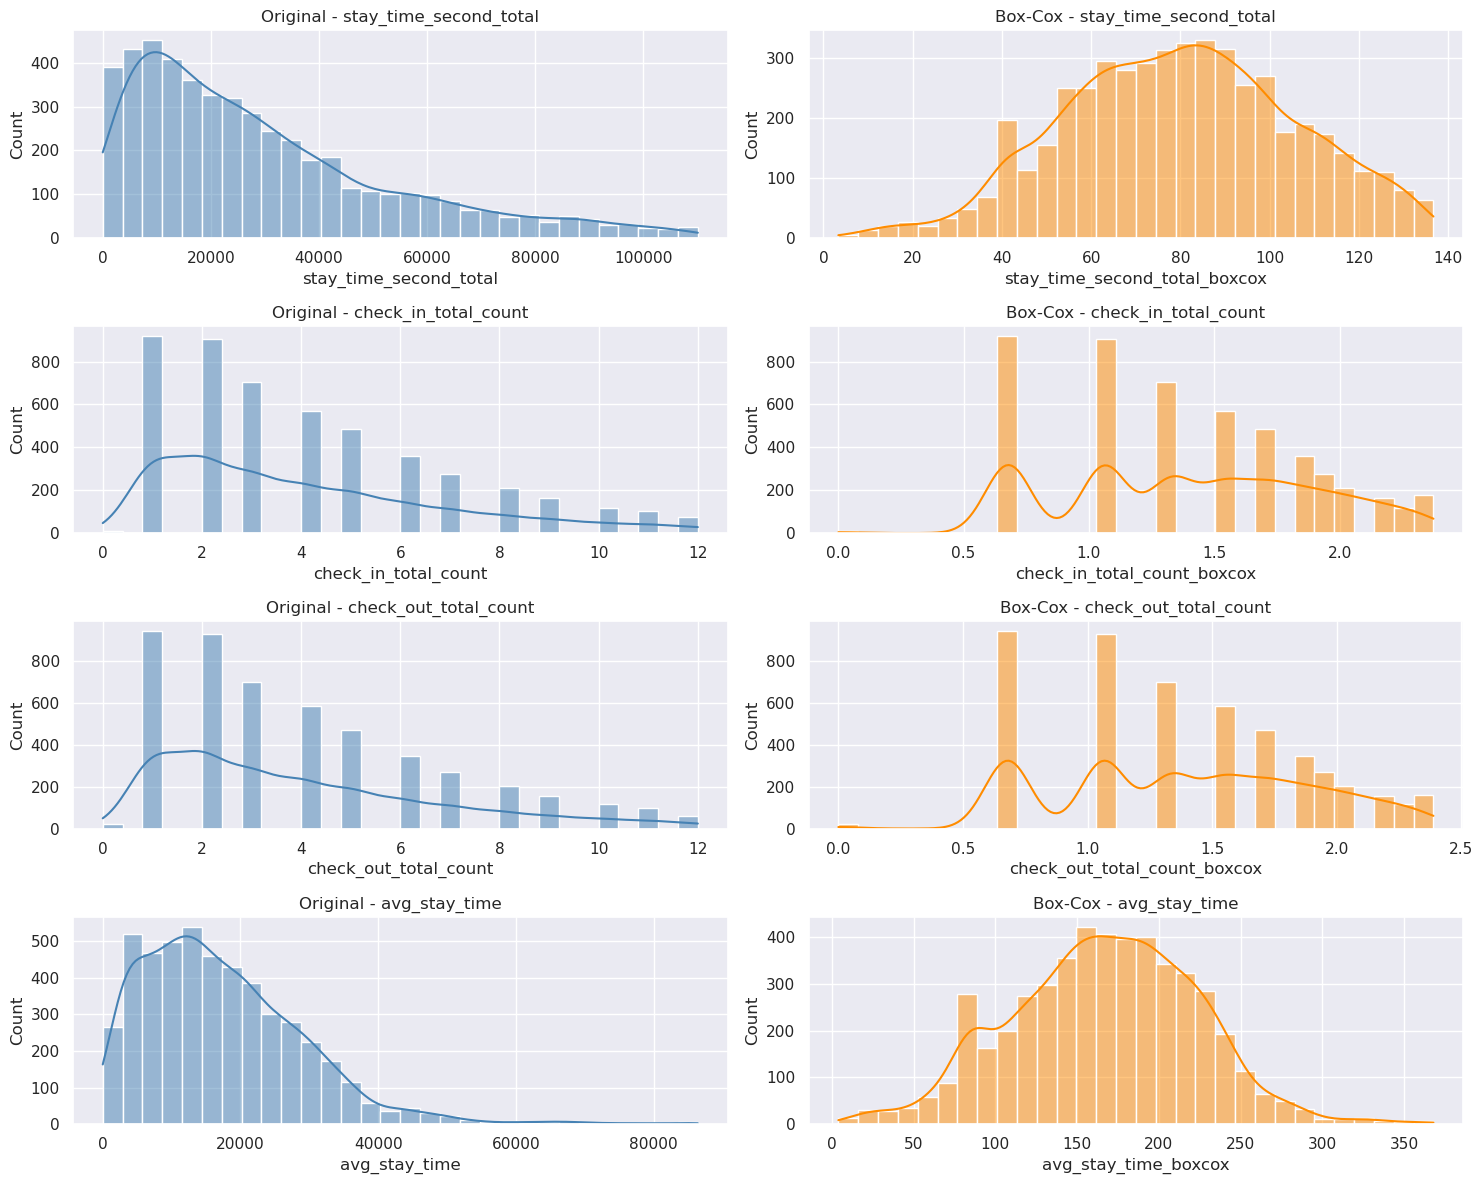

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["stay_time_second_total", "check_in_total_count", "check_out_total_count", "avg_stay_time"]

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    # 원본 (in/out 이상치 제거 후)
    plt.subplot(len(cols), 2, 2*i-1)
    sns.histplot(df_inout_removed[col], bins=30, kde=True, color="steelblue")
    plt.title(f"Original - {col}")

    # Box-Cox (in/out 이상치 제거 후 → 변환본)
    plt.subplot(len(cols), 2, 2*i)
    sns.histplot(df_inout_bc[col + "_boxcox"], bins=30, kde=True, color="darkorange")
    plt.title(f"Box-Cox - {col}")

plt.tight_layout()
plt.show()

In [197]:
cols = ["stay_time_second_total", "check_in_total_count", "check_out_total_count", "avg_stay_time"]
df_box = df_inout_bc.drop(cols, axis=1)
df_box

,last_site_id,area_pyeong,trial_day,trial_gap,start_trial_year,final_trial_year,is_payment,holiday_weekend,other_site,start_trial_month_sin,...,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos,office_spot,stay_time_second_total_boxcox,check_in_total_count_boxcox,check_out_total_count_boxcox,avg_stay_time_boxcox
0,3,150,1,0,2021,2021,0,0,0,1.224647e-16,...,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521,6,52.411511,0.678715,0.679728,114.829476
1,3,150,1,3,2021,2021,1,0,0,1.224647e-16,...,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521,6,125.653529,1.329365,1.333309,366.856582
2,4,100,1,0,2021,2021,0,0,0,1.224647e-16,...,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521,7,68.545261,1.329365,1.333309,163.608799
3,3,150,1,0,2021,2021,0,0,0,1.224647e-16,...,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521,6,66.151001,0.678715,0.679728,156.089655
4,2,100,1,1,2021,2021,0,0,0,-5.000000e-01,...,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969,2,54.841087,0.678715,0.679728,121.880526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,4,100,3,0,2023,2024,1,1,1,-2.449294e-16,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7,61.007286,1.953111,1.961748,84.677604
5477,6,150,3,0,2023,2024,1,1,1,-2.449294e-16,...,0.866025,-0.258819,9.659258e-01,0.000000,1.000000,3,126.564205,2.374582,2.387479,225.058900
5478,4,100,2,0,2023,2024,1,1,1,-2.449294e-16,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7,52.490805,1.329365,1.333309,83.628365
5479,47,50,2,0,2023,2024,0,1,0,-2.449294e-16,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,1,90.875469,1.834989,1.842591,173.578216


In [198]:
df_box.columns.tolist()

['last_site_id',
 'area_pyeong',
 'trial_day',
 'trial_gap',
 'start_trial_year',
 'final_trial_year',
 'is_payment',
 'holiday_weekend',
 'other_site',
 'start_trial_month_sin',
 'start_trial_month_cos',
 'start_trial_hour_sin',
 'start_trial_hour_cos',
 'start_trial_day_of_week_sin',
 'start_trial_day_of_week_cos',
 'final_trial_month_sin',
 'final_trial_month_cos',
 'final_trial_hour_sin',
 'final_trial_hour_cos',
 'final_trial_day_of_week_sin',
 'final_trial_day_of_week_cos',
 'office_spot',
 'stay_time_second_total_boxcox',
 'check_in_total_count_boxcox',
 'check_out_total_count_boxcox',
 'avg_stay_time_boxcox']

In [199]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 표준화할 컬럼들
cols_to_scale = [
    "area_pyeong",
    "stay_time_second_total_boxcox",
    "check_in_total_count_boxcox",
    "check_out_total_count_boxcox",
    "avg_stay_time_boxcox"
]

# 스케일러 적용
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_box[cols_to_scale])

# DataFrame으로 변환 (같은 컬럼명 유지)
df_scaled = pd.DataFrame(scaled_values, columns=cols_to_scale, index=df_box.index)

# 필요하면 원래 df_box랑 합치기
scaled_df = df_box.copy()
scaled_df[cols_to_scale] = df_scaled

scaled_df

,last_site_id,area_pyeong,trial_day,trial_gap,start_trial_year,final_trial_year,is_payment,holiday_weekend,other_site,start_trial_month_sin,...,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos,office_spot,stay_time_second_total_boxcox,check_in_total_count_boxcox,check_out_total_count_boxcox,avg_stay_time_boxcox
0,3,0.938704,1,0,2021,2021,0,0,0,1.224647e-16,...,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521,6,-1.072629,-1.446376,-1.413182,-0.908705
1,3,0.938704,1,3,2021,2021,1,0,0,1.224647e-16,...,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521,6,1.776143,-0.148121,-0.118708,3.545337
2,4,-0.238279,1,0,2021,2021,0,0,0,1.224647e-16,...,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521,7,-0.445101,-0.148121,-0.118708,-0.046635
3,3,0.938704,1,0,2021,2021,0,0,0,1.224647e-16,...,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521,6,-0.538227,-1.446376,-1.413182,-0.179520
4,2,-0.238279,1,1,2021,2021,0,0,0,-5.000000e-01,...,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969,2,-0.978129,-1.446376,-1.413182,-0.784093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,4,-0.238279,3,0,2023,2024,1,1,1,-2.449294e-16,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7,-0.738293,1.096451,1.125970,-1.441576
5477,6,0.938704,3,0,2023,2024,1,1,1,-2.449294e-16,...,0.866025,-0.258819,9.659258e-01,0.000000,1.000000,3,1.811564,1.937422,1.969168,1.039365
5478,4,-0.238279,2,0,2023,2024,1,1,1,-2.449294e-16,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7,-1.069544,-0.148121,-0.118708,-1.460119
5479,47,-1.415262,2,0,2023,2024,0,1,0,-2.449294e-16,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,1,0.423439,0.860760,0.889970,0.129553


In [200]:
scaled_df.columns

Index(['last_site_id', 'area_pyeong', 'trial_day', 'trial_gap',
       'start_trial_year', 'final_trial_year', 'is_payment', 'holiday_weekend',
       'other_site', 'start_trial_month_sin', 'start_trial_month_cos',
       'start_trial_hour_sin', 'start_trial_hour_cos',
       'start_trial_day_of_week_sin', 'start_trial_day_of_week_cos',
       'final_trial_month_sin', 'final_trial_month_cos',
       'final_trial_hour_sin', 'final_trial_hour_cos',
       'final_trial_day_of_week_sin', 'final_trial_day_of_week_cos',
       'office_spot', 'stay_time_second_total_boxcox',
       'check_in_total_count_boxcox', 'check_out_total_count_boxcox',
       'avg_stay_time_boxcox'],
      dtype='object')

In [201]:
##############################

scaled_df = scaled_df.drop(['start_trial_year', 
        'final_trial_year', 
        'holiday_weekend', 
        'last_site_id'
        ] ,axis=1)

scaled_df

,area_pyeong,trial_day,trial_gap,is_payment,other_site,start_trial_month_sin,start_trial_month_cos,start_trial_hour_sin,start_trial_hour_cos,start_trial_day_of_week_sin,...,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos,office_spot,stay_time_second_total_boxcox,check_in_total_count_boxcox,check_out_total_count_boxcox,avg_stay_time_boxcox
0,0.938704,1,0,0,0,1.224647e-16,-1.000000,-0.866025,5.000000e-01,0.974928,...,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521,6,-1.072629,-1.446376,-1.413182,-0.908705
1,0.938704,1,3,1,0,1.224647e-16,-1.000000,0.000000,1.000000e+00,0.974928,...,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521,6,1.776143,-0.148121,-0.118708,3.545337
2,-0.238279,1,0,0,0,1.224647e-16,-1.000000,-0.707107,-7.071068e-01,0.974928,...,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521,7,-0.445101,-0.148121,-0.118708,-0.046635
3,0.938704,1,0,0,0,1.224647e-16,-1.000000,-0.258819,-9.659258e-01,0.974928,...,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521,6,-0.538227,-1.446376,-1.413182,-0.179520
4,-0.238279,1,1,0,0,-5.000000e-01,-0.866025,-0.258819,-9.659258e-01,0.433884,...,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969,2,-0.978129,-1.446376,-1.413182,-0.784093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,-0.238279,3,0,1,1,-2.449294e-16,1.000000,-1.000000,-1.836970e-16,-0.974928,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7,-0.738293,1.096451,1.125970,-1.441576
5477,0.938704,3,0,1,1,-2.449294e-16,1.000000,-0.707107,-7.071068e-01,-0.974928,...,0.866025,-0.258819,9.659258e-01,0.000000,1.000000,3,1.811564,1.937422,1.969168,1.039365
5478,-0.238279,2,0,1,1,-2.449294e-16,1.000000,-1.000000,-1.836970e-16,-0.974928,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7,-1.069544,-0.148121,-0.118708,-1.460119
5479,-1.415262,2,0,0,0,-2.449294e-16,1.000000,-0.707107,-7.071068e-01,-0.974928,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,1,0.423439,0.860760,0.889970,0.129553


In [202]:
# scaled_df_encoded = pd.get_dummies(
#     scaled_df,
#     columns=['start_trial_year', 'final_trial_year'],
#     prefix=['startY', 'finalY']
# )

# # startY_, finalY_로 시작하는 모든 컬럼을 찾아 변환
# cols = [c for c in scaled_df_encoded.columns if c.startswith(('startY_', 'finalY_'))]
# scaled_df_encoded[cols] = scaled_df_encoded[cols].astype(int)


# scaled_df_encoded

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

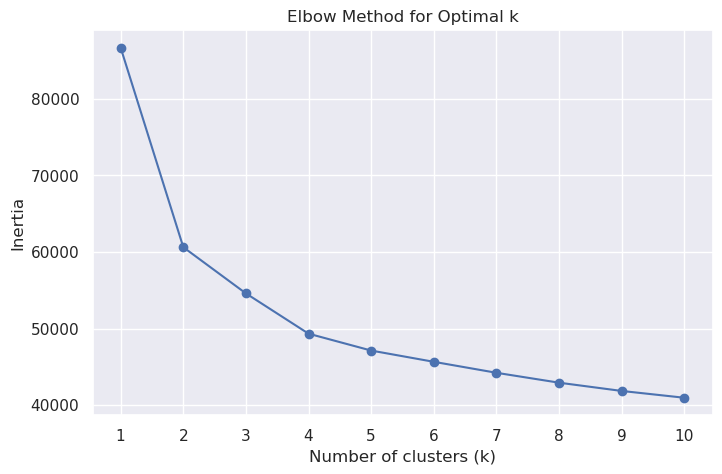

In [203]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# inertia 값을 저장할 리스트
inertia = []

# k 범위 설정 (예: 1~10)
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xticks(K)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [204]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Scree Plot')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

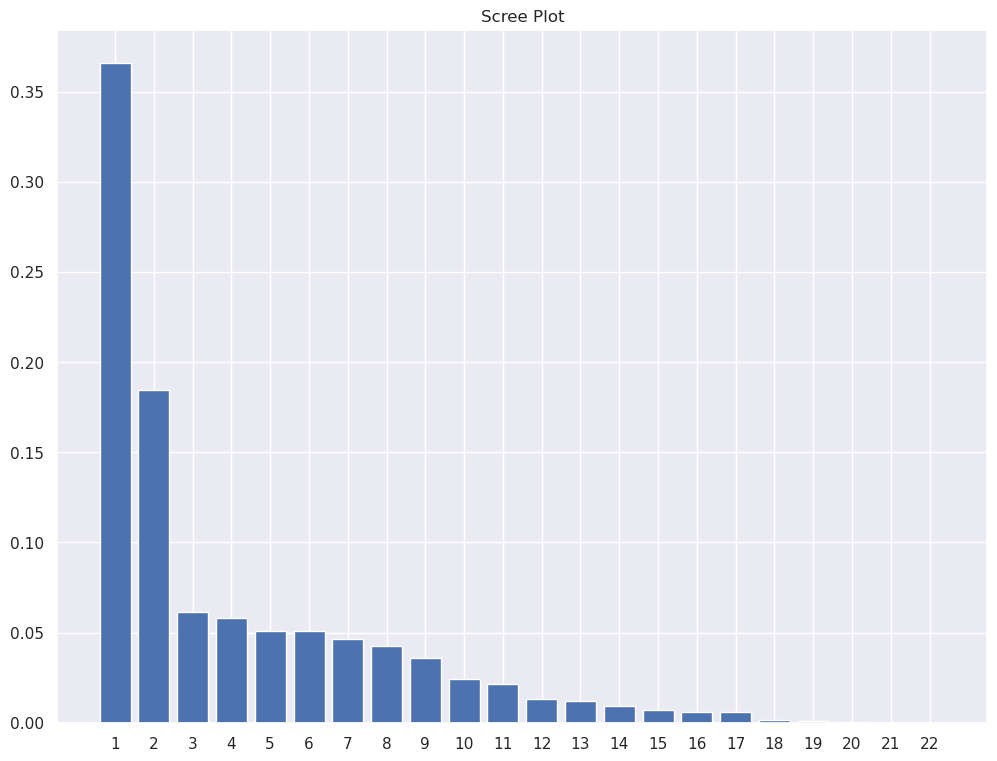

In [205]:
# 분산 설명력 보기
pca = PCA(n_components=22)
pca_result = pca.fit_transform(scaled_df)

n_components = len(scaled_df.columns)

plt.bar(np.arange(1, n_components+1), pca.explained_variance_ratio_)
plt.xticks(ticks=np.arange(1, n_components+1))
plt.title("Scree Plot")

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

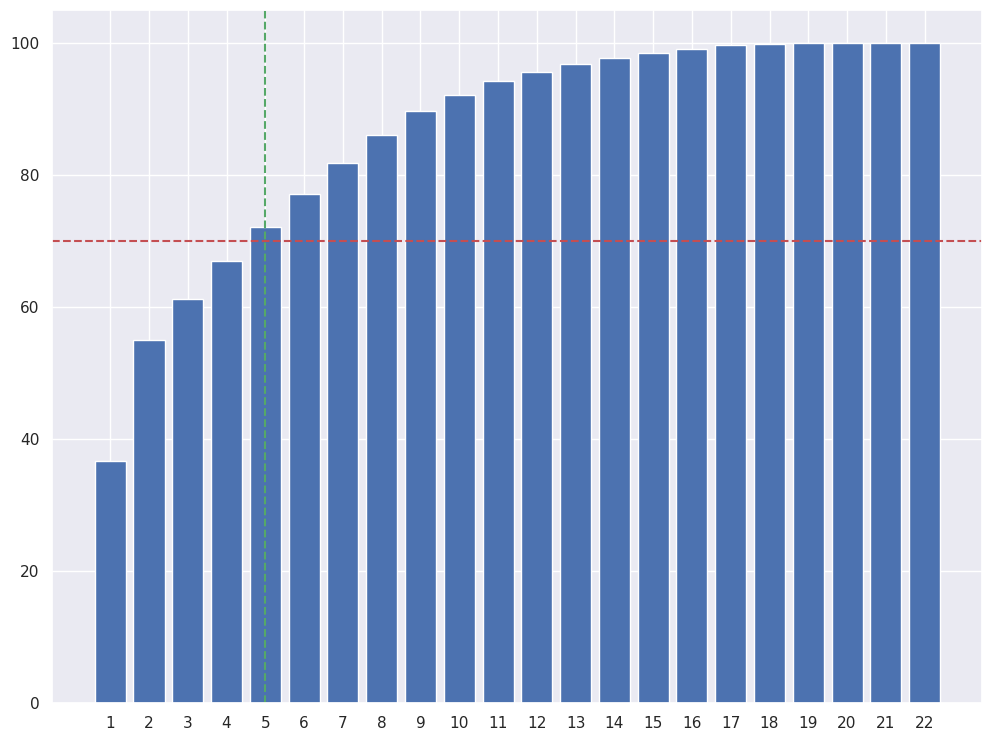

In [206]:
cum_var_percent = np.cumsum(pca.explained_variance_ratio_ * 100)

# 분산 누적합 70% 기준 주성분 표시
plt.bar(np.arange(1, n_components+1), cum_var_percent)
plt.axhline(y=70, color='r', linestyle='--', label='70% threshold')

threshold_index = np.argmax(cum_var_percent >= 70)
plt.axvline(x=threshold_index+1, color='g', linestyle='--', label=f'PC{threshold_index+1}')

plt.xticks(ticks=np.arange(1, n_components+1))
plt.show()

In [207]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # 3D projection을 위한 모듈

# PCA 실행 (3차원으로 축소)
pca_2 = PCA(n_components=5)
pca_result_2 = pca_2.fit_transform(scaled_df)

# 결과 DataFrame으로 변환
pca_df = pd.DataFrame(pca_result_2, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [208]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,0.902333,2.486302,-0.362935,-1.595260,-1.272428
1,1.101027,-2.107303,0.924385,-1.981360,-1.079940
2,2.095470,0.672069,0.374277,-0.913385,-1.263883
3,0.938757,1.844330,-0.114017,-1.569178,-1.227701
4,-3.038029,2.156439,0.841371,-1.364038,-0.203033
...,...,...,...,...,...
4895,2.254483,-0.082802,-1.325635,1.540213,0.667659
4896,-1.554979,-3.816032,-1.437431,0.975808,0.795385
4897,2.051968,1.515241,-1.068235,1.425656,0.762784
4898,-3.776459,-1.372077,-0.002590,1.921849,0.841301


고정된 클러스터 수 (모델 설정): 4
실제로 생성된 클러스터 라벨: [0 1 2 3]
클러스터 개수: 4


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

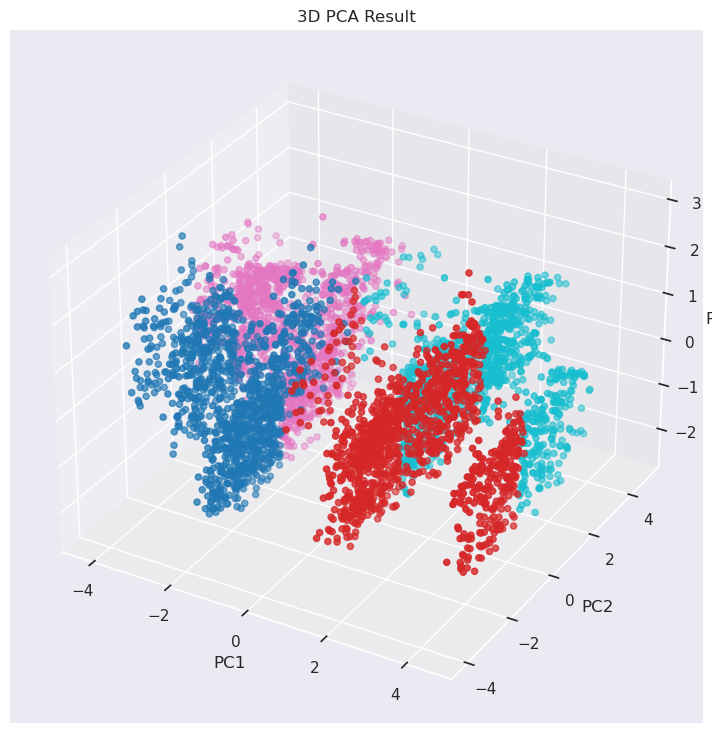

In [209]:
from sklearn.cluster import KMeans
import numpy as np

# 실행 시 기존 kmeans_label 컬럼 제거
if 'kmeans_label' in pca_df.columns:
    pca_df = pca_df.drop(columns=['kmeans_label'])

# K-means 모델 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(pca_df[['PC1','PC2','PC3']])  # 주성분만 사용

# 라벨 추가
pca_df['kmeans_label'] = model.labels_

# 클러스터 개수 확인
print("고정된 클러스터 수 (모델 설정):", model.n_clusters)
print("실제로 생성된 클러스터 라벨:", np.unique(model.labels_))
print("클러스터 개수:", len(np.unique(model.labels_)))

# 3D 시각화
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['kmeans_label'], marker='o', cmap='tab10'
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Result")

plt.show()

In [210]:
scaled_df

,area_pyeong,trial_day,trial_gap,is_payment,other_site,start_trial_month_sin,start_trial_month_cos,start_trial_hour_sin,start_trial_hour_cos,start_trial_day_of_week_sin,...,final_trial_month_cos,final_trial_hour_sin,final_trial_hour_cos,final_trial_day_of_week_sin,final_trial_day_of_week_cos,office_spot,stay_time_second_total_boxcox,check_in_total_count_boxcox,check_out_total_count_boxcox,avg_stay_time_boxcox
0,0.938704,1,0,0,0,1.224647e-16,-1.000000,-0.866025,5.000000e-01,0.974928,...,-1.000000,-0.500000,8.660254e-01,0.974928,-0.222521,6,-1.072629,-1.446376,-1.413182,-0.908705
1,0.938704,1,3,1,0,1.224647e-16,-1.000000,0.000000,1.000000e+00,0.974928,...,-1.000000,-0.258819,9.659258e-01,0.974928,-0.222521,6,1.776143,-0.148121,-0.118708,3.545337
2,-0.238279,1,0,0,0,1.224647e-16,-1.000000,-0.707107,-7.071068e-01,0.974928,...,-1.000000,-0.965926,2.588190e-01,0.974928,-0.222521,7,-0.445101,-0.148121,-0.118708,-0.046635
3,0.938704,1,0,0,0,1.224647e-16,-1.000000,-0.258819,-9.659258e-01,0.974928,...,-1.000000,-0.965926,-2.588190e-01,0.974928,-0.222521,6,-0.538227,-1.446376,-1.413182,-0.179520
4,-0.238279,1,1,0,0,-5.000000e-01,-0.866025,-0.258819,-9.659258e-01,0.433884,...,-0.866025,-0.866025,-5.000000e-01,0.433884,-0.900969,2,-0.978129,-1.446376,-1.413182,-0.784093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,-0.238279,3,0,1,1,-2.449294e-16,1.000000,-1.000000,-1.836970e-16,-0.974928,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7,-0.738293,1.096451,1.125970,-1.441576
5477,0.938704,3,0,1,1,-2.449294e-16,1.000000,-0.707107,-7.071068e-01,-0.974928,...,0.866025,-0.258819,9.659258e-01,0.000000,1.000000,3,1.811564,1.937422,1.969168,1.039365
5478,-0.238279,2,0,1,1,-2.449294e-16,1.000000,-1.000000,-1.836970e-16,-0.974928,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,7,-1.069544,-0.148121,-0.118708,-1.460119
5479,-1.415262,2,0,0,0,-2.449294e-16,1.000000,-0.707107,-7.071068e-01,-0.974928,...,0.866025,-1.000000,-1.836970e-16,0.000000,1.000000,1,0.423439,0.860760,0.889970,0.129553


In [211]:
pca_2.components_.T

array([[ 2.44150527e-02, -7.46082640e-02, -7.04739677e-01,
        -4.69356411e-01,  2.51960669e-02],
       [ 5.22066805e-03, -2.22353660e-01,  5.02353902e-02,
         4.13931209e-02, -7.74989548e-02],
       [-7.06187264e-03,  3.96608210e-02,  5.19518318e-02,
        -1.50353428e-01,  4.25456025e-02],
       [ 1.50272814e-02,  9.46471105e-03,  4.90428935e-05,
        -3.98915260e-02, -2.84087736e-02],
       [ 3.09686846e-03, -1.07793005e-02,  3.86755966e-04,
         7.44853800e-03, -2.70013246e-03],
       [-2.85534550e-02, -1.53664071e-02, -3.80156522e-01,
         1.17353309e-01, -9.06459117e-02],
       [-1.42694477e-02,  1.42065736e-02, -1.91983230e-01,
         5.97997688e-01,  8.30366102e-02],
       [ 6.65812539e-03, -1.06699954e-01,  5.90018296e-02,
        -1.22520167e-02, -1.55922226e-02],
       [-1.10490903e-02,  5.01289643e-02,  1.17576198e-02,
        -1.73225161e-02, -3.24833750e-02],
       [-1.19339372e-03,  1.67084136e-03,  4.58500962e-02,
         1.48509748e-02

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

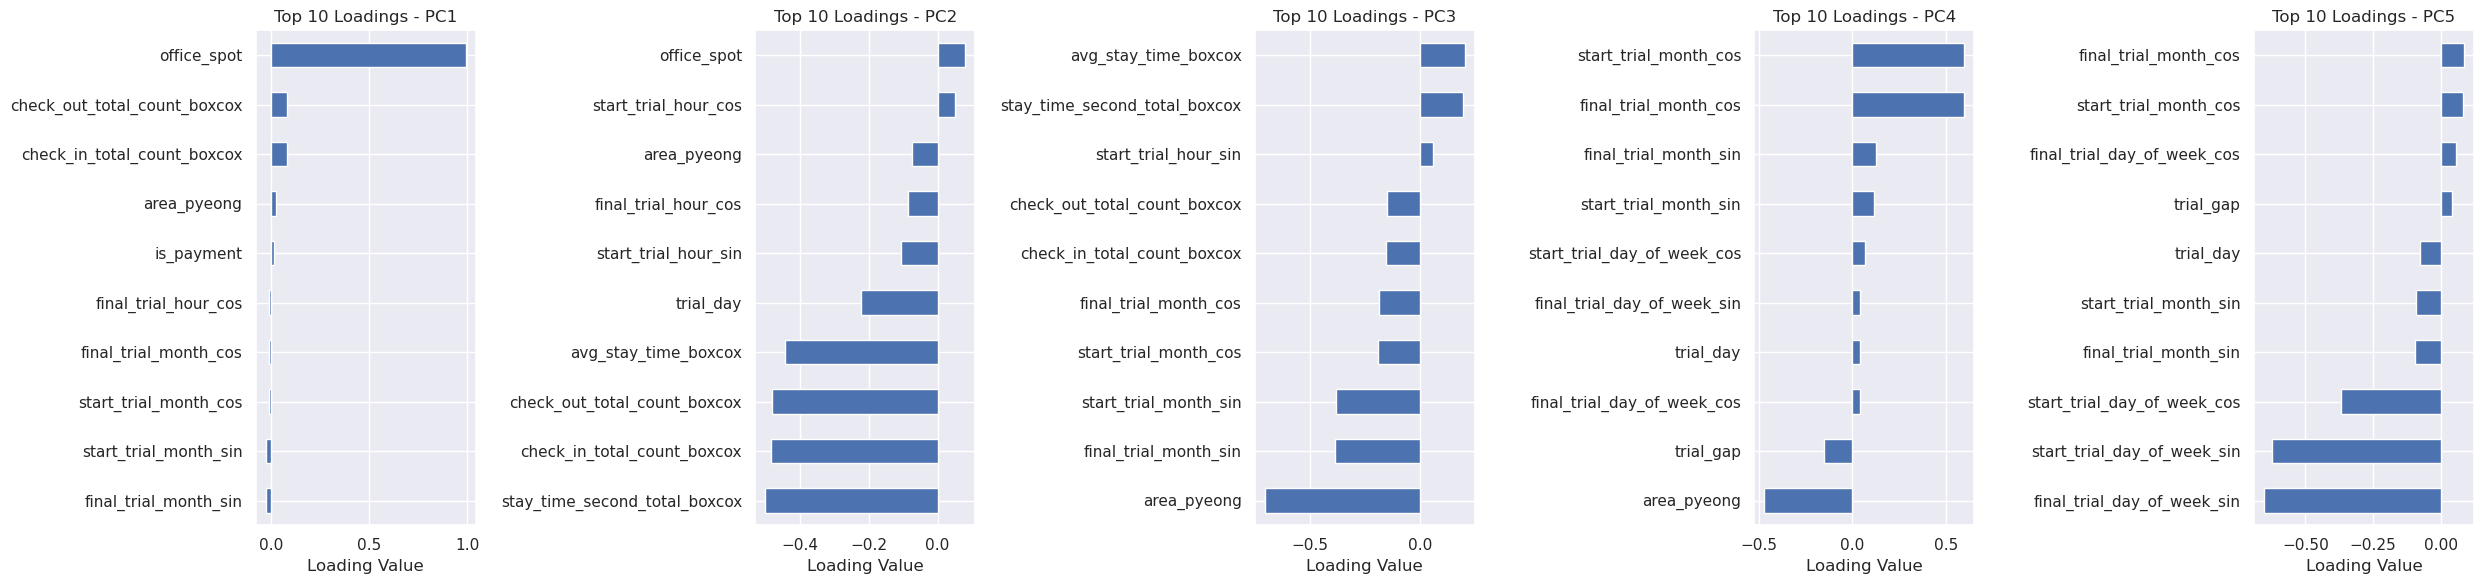

In [212]:
# PCA 실행할 때 사용했던 feature만 다시 가져오기
features = [col for col in scaled_df.columns if col != 'kmeans_label']

# 로딩값 추출
loadings = pd.DataFrame(
    pca_2.components_.T,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index=features
)

# 1행 5열 subplot
fig, axes = plt.subplots(1, 5, figsize=(25, 6))

for i, pc in enumerate(['PC1', 'PC2', 'PC3', 'PC4', 'PC5']):
    # 절댓값 기준 상위 10개
    top10 = loadings[pc].abs().sort_values(ascending=False).head(10)
    
    # 실제 값(부호 포함) 그래프
    loadings.loc[top10.index, pc].sort_values().plot.barh(ax=axes[i])
    axes[i].set_title(f"Top 10 Loadings - {pc}")
    axes[i].set_xlabel("Loading Value")

plt.tight_layout()
plt.show()

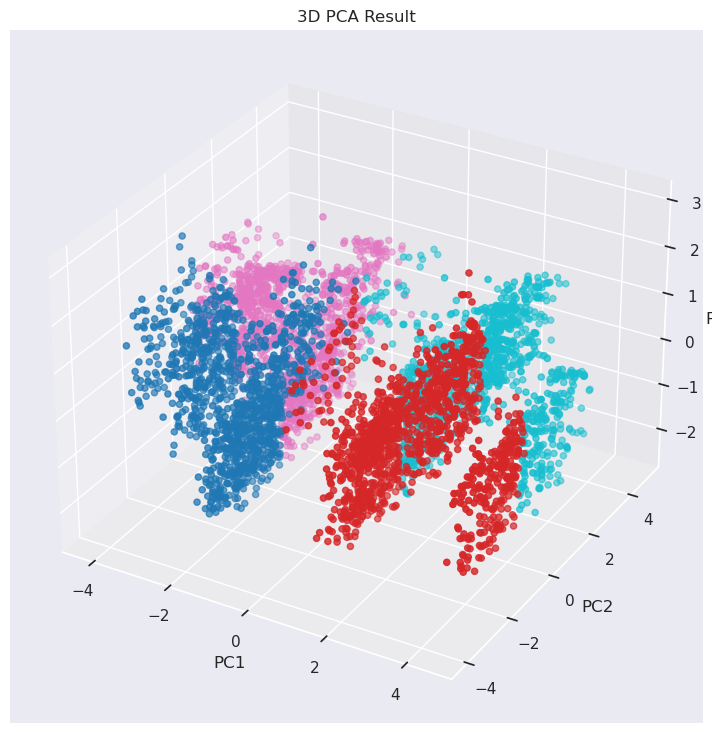

### **PC1 : 지점별 결제율 사무직 밀집 지역별 강도(지점에서 가까운 역 기준 사무직 수요가 많은 순) 중심 축**

### **PC2 : 이용 강도(얼마나 오래, 자주 사용하는지)**

### **PC3 : 지점 평수(규모) + 이용횟수**

### PC4 : 체험을 언제 하고 체험종료가 언제 끝나는지

### PC5 : 요일/월 패턴(마찬가지로 시간관련)


## 군집별 해석 요약

- 🔵 파랑 (좌측 아래쪽)
  - **PC1 낮음, PC2 낮음, PC3 낮음**
  - 특정 지점(office_spot) 영향도 낮고, 이용 강도와 평수 모두 낮음
  - **이용 빈도와 강도가 모두 낮은 라이트 유저**
  - 결제 전환 가능성 낮고, 이탈 위험이 높은 고객군

- 🔴 빨강 (우측 아래쪽)
  - **PC1 보통~높음, PC2 중간, PC3 낮음**
  - 특정 지점과 다소 연관 있으며, 작은 평수 지점 중심
  - **작은 지점에서 꾸준히 이용하는 중도 강도 유저**
  - 지점 회전율에 일정 영향을 주는 그룹

- 🟦 하늘 (우측 중앙)
  - **PC1 중간, PC2 중간, PC3 높음**
  - 큰 평수 지점을 중심으로 이용하며, 강도는 중간 수준
  - **넓은 지점을 선호하고 보통 수준으로 이용하는 고객군**
  - 특정 지점에 종속되지 않고 다양한 지점 사용 가능성이 있는 그룹

- 🌸 분홍 (좌측 위쪽)
  - **PC1 높음, PC2 높음, PC3 높음**
  - 특정 지점(office_spot)에 강하게 집중하며, 큰 평수 지점을 자주·오래 이용
  - **충성도 높은 핵심 고객군**
  - 장기적인 관계 유지가 중요한 그룹


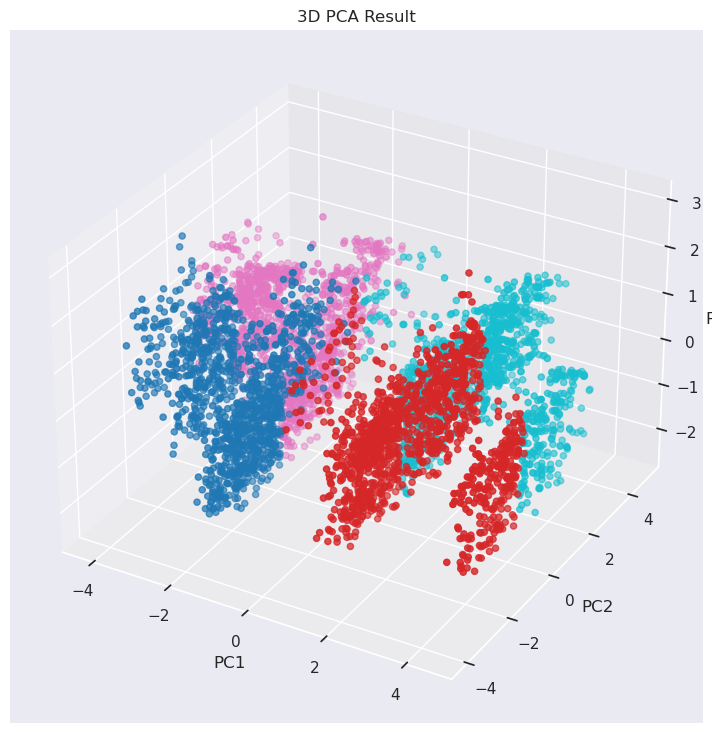
- 🔵 파랑: 이용 빈도와 강도가 모두 낮은 **라이트 유저**  
- 🔴 빨강: 작은 지점을 중심으로 꾸준히 사용하는 **중도 강도 유저**  
- 🟦 하늘: 큰 지점을 선호하며 보통 수준으로 이용하는 **균형형 유저**  
- 🌸 분홍: 특정 지점에 집중해 자주·오래 사용하는 **충성 핵심 유저**

In [213]:
pca_df

,PC1,PC2,PC3,PC4,PC5,kmeans_label
0,0.902333,2.486302,-0.362935,-1.595260,-1.272428,3
1,1.101027,-2.107303,0.924385,-1.981360,-1.079940,1
2,2.095470,0.672069,0.374277,-0.913385,-1.263883,3
3,0.938757,1.844330,-0.114017,-1.569178,-1.227701,3
4,-3.038029,2.156439,0.841371,-1.364038,-0.203033,2
...,...,...,...,...,...,...
4895,2.254483,-0.082802,-1.325635,1.540213,0.667659,1
4896,-1.554979,-3.816032,-1.437431,0.975808,0.795385,0
4897,2.051968,1.515241,-1.068235,1.425656,0.762784,3
4898,-3.776459,-1.372077,-0.002590,1.921849,0.841301,0


In [214]:
pca_df['is_payment'] = scaled_df['is_payment'].values

In [215]:
pca_df

,PC1,PC2,PC3,PC4,PC5,kmeans_label,is_payment
0,0.902333,2.486302,-0.362935,-1.595260,-1.272428,3,0
1,1.101027,-2.107303,0.924385,-1.981360,-1.079940,1,1
2,2.095470,0.672069,0.374277,-0.913385,-1.263883,3,0
3,0.938757,1.844330,-0.114017,-1.569178,-1.227701,3,0
4,-3.038029,2.156439,0.841371,-1.364038,-0.203033,2,0
...,...,...,...,...,...,...,...
4895,2.254483,-0.082802,-1.325635,1.540213,0.667659,1,1
4896,-1.554979,-3.816032,-1.437431,0.975808,0.795385,0,1
4897,2.051968,1.515241,-1.068235,1.425656,0.762784,3,1
4898,-3.776459,-1.372077,-0.002590,1.921849,0.841301,0,0


In [ ]:
# 클러스터별 결제율 계산
cluster_payment_rate = (
    pca_df.groupby("kmeans_label")["is_payment"]
    .mean()
    .reset_index()
    .rename(columns={"is_payment": "payment_rate"})
)

print(cluster_payment_rate)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2136149783.py, line 4)

## 군집별 결제율 요약

- 🔵 파랑 (kmeans_label=0)  
  - 고객 특성: 이용 빈도와 강도가 모두 낮은 **라이트 유저**  
  - 결제율: **31.64%** (가장 낮음, 이탈 위험 상대적으로 높음)  

- 🔴 빨강 (kmeans_label=1)  
  - 고객 특성: 작은 지점을 중심으로 꾸준히 사용하는 **중도 강도 유저**  
  - 결제율: **38.51%** (중상 수준, 안정적인 결제 고객군)  

- 🟦 하늘 (kmeans_label=2)  
  - 고객 특성: 큰 지점을 선호하며 보통 수준으로 이용하는 **균형형 유저**  
  - 결제율: **35.33%** (중간 수준, 충성도 잠재력 있음)  

- 🌸 분홍 (kmeans_label=3)  
  - 고객 특성: 특정 지점에 집중해 자주·오래 사용하는 **충성 핵심 유저**  
  - 결제율: **42.30%** (가장 높음, 핵심 가치 고객군)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차표 생성
contingency = pd.crosstab(pca_df['kmeans_label'], pca_df['is_payment'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-square: 30.93778992454896
p-value: 8.760760130221176e-07
Degrees of freedom: 3


- 카이제곱 독립성 검정 결과
    - Chi-square 통계량: 30.94
    - p-value: 8.76e-07 (≈ 0.000000876)
    - 자유도(df): 3